## Raj Patil  
## CS18BTECH11039

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
rootdir = Path('/content/drive/MyDrive/DL_A4')
assert rootdir.exists()

In [ ]:
%pdb on

Automatic pdb calling has been turned ON


#### **Welcome to Assignment 4 (part-1) on Deep Learning for Computer Vision.**
In this assignment you will get a chance to implement LSTM cell from Scratch and Usage of Recurrent Neural Network for 1D time series Prediction task .

#### **Instructions**
1. Use Python 3.x to run this notebook
3. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'.
you should not change anything else code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.
4. Read documentation of each function carefully.

## Question 1:

Given a sequence of values of a 1D input time series from time t = 1 to t = 5, predict the value of the time series at t = 6 using RNN.

Here we trained an RNN in such a way that, given values of input time series from t = 1 to t=i ; it will predict the value at t= i+1.

Hint : Design an RNN using pytorch's nn.RNN to create an RNN layer , then add a fully-connected layer to get the required output size.

Choose 32 as the number of features in the RNN output and in the hidden state. Also, choose number of layers to be 1 to make up the RNN, typically such number varies depending on different tasks. The value greater than 1 means that you'll create a stacked RNN. Also, use "batch_first =True". Here, "batch_first" implies whether or not the input/output of the RNN will have the batch_size as the first dimension (batch_size, seq_length, hidden_dim). 


In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


## Fixing the seed for Reproducibility
np.random.seed(1)
torch.manual_seed(1)

## Define 1D input time series, which spans from t= 1 to t=6.
input_series = np.random.randn(6,1)


class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        ### YOUR CODE STARTS HERE
        self.r_block = nn.RNN(input_size, hidden_dim, n_layers,batch_first=True)
        self.fc_out = nn.Linear(hidden_dim,output_size)
        self.hidden_dim = hidden_dim

    def forward(self, x, hidden):
        output,new_hidden = self.r_block(x, hidden)
        output =  self.fc_out(output.view(-1,self.hidden_dim))
        return output,new_hidden
        ### YOUR CODE ENDS HERE

# decide on hyperparameters
input_size=1    ## 1D input
output_size=1   ## 1D output
hidden_dim=32  ## Hidden state feature dimension of RNN
n_layers=1     ## No. of stacked layers in RNN

# instantiate an RNN
rnn = RNN(input_size, output_size, hidden_dim, n_layers)

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

# train the RNN
def train(rnn, n_steps, print_every):
    
    # initialize the hidden state
    hidden = None      
    
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data 
        x = input_series[:-1]
        y = input_series[1:]

        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero gradients
        optimizer.zero_grad()
        # perform backprop and update weights
        loss.backward()
        optimizer.step()

        # display loss and predictions
        if batch_i%print_every == 0: 
            print() 
            print (batch_i)      
            print('Loss: ', loss.item())
            print ('Predicted Value: ', prediction.data.numpy().flatten())
            print ('True Value: ', y_tensor.data.numpy().flatten())
            
    
    return rnn,prediction[-1]

# train the rnn and monitor results
trained_rnn,final_prediction = train(rnn, n_steps = 75, print_every= 11)
print ('Final predicted value of input time series at t=6: ',final_prediction.item())


0
Loss:  1.5117348432540894
Predicted Value:  [-0.18635052 -0.00746428  0.05009793  0.05678663 -0.02306957]
True Value:  [-0.6117564  -0.5281718  -1.0729686   0.86540765 -2.3015387 ]

11
Loss:  0.13453072309494019
Predicted Value:  [ 0.00849447 -0.31584212 -1.2586135   1.2727582  -2.5075972 ]
True Value:  [-0.6117564  -0.5281718  -1.0729686   0.86540765 -2.3015387 ]

22
Loss:  0.19528236985206604
Predicted Value:  [-1.2275374  -0.65807223 -0.54608953  0.45658743 -1.933278  ]
True Value:  [-0.6117564  -0.5281718  -1.0729686   0.86540765 -2.3015387 ]

33
Loss:  0.08917436003684998
Predicted Value:  [-0.07242055 -0.87209296 -1.0512483   0.8208605  -2.486608  ]
True Value:  [-0.6117564  -0.5281718  -1.0729686   0.86540765 -2.3015387 ]

44
Loss:  0.03353014960885048
Predicted Value:  [-0.893936  -0.4294107 -1.1992261  0.8064023 -2.0589504]
True Value:  [-0.6117564  -0.5281718  -1.0729686   0.86540765 -2.3015387 ]

55
Loss:  0.009381274692714214
Predicted Value:  [-0.52645415 -0.6100819  -0

## Question 2:

Given a Multivariate input time sequence and all the trainable parameters of LSTM Cell; Implement all the functionalities of the LSTM cell in order to predict the hidden state and output at time=t; given LSTM "cell state" at previous time step (t= t-1), LSTM "hidden state" at previous time step ( t= t-1) and the input at time=t. Hint : Follow the following sets of equation for implementing the functionality of LSTM Cell.

Forget GATE: $f_{t} = \sigma(W_{f}[ a_{t-1} ; x_{t}]  + b_{f}) $ (Note that ";" denotes contatenation operation.)

Update GATE: $i_{t} = \sigma(W_{i}[ a_{t-1} ; x_{t} ] + b_i )$

Memory GATE: $\tilde{c}_{t} = tanh(W_c[ a_{t-1} ; x_{t} ] + b_c )$
            update step -> $c_{t} =  f_{t} * c_{t-1} + i_{t} * \tilde{c}_{t}$  (This operation determines how much information to keep from past and how much to add from current step information)

Output GATE: $o_{t} = \sigma(W_o [ a_{t-1} ; x_{t} ] + b_o)$
           Final Output: $a_{t} = o_{t}*tanh(c_t) $
( Note: For implementing "tanh" operation; use numpy.tanh libary function)


a> Compute the value of a specific component of LSTM cell "Output" (y), i.e. y[1, 3, 4]? 

b> Also find the value of a specific component of LSTM hidden state output(a) ; i.e. a[2,1,5].




In [ ]:

import numpy as np
np.random.seed(2)

## Function implements Sigmoid Activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Function implements Softmax Activation
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

## Function implements LSTM "forward pass" of a single time step..i.e. given x at time step t, hidden state 
##at previous time step Memory state at previous time step , this function computes predicted output y at time step t. 

def lstm_forward_pass(xt, a_prev, c_prev, parameters):
    """
    Implement a single forward step of the LSTM-cell 

    Arguments:
    xt -- your input data at timestep "t"
    a_prev -- Hidden state at timestep "t-1"
    c_prev -- Memory state at timestep "t-1"

    # Trainable Parameters of a LSTM cell
    Wf -- Weight matrix of the forget gate; bf -- Bias of the forget gate
    Wi -- Weight matrix of the update gate; bi -- Bias of the update gate
    Wc -- Weight matrix of the first "tanh"; bc --  Bias of the first "tanh"
    Wo -- Weight matrix of the output gate; bo --  Bias of the output gate
    Wy -- Weight matrix relating the hidden-state to the output; by -- Bias relating the hidden-state to the output
                        
    The LSTM Cell MUST Return:
    a_next -- next hidden state
    c_next -- next memory state
    yt_pred -- LSTM output prediction at timestep "t"
    cache -- tuple of values needed for the backward pass, contains (a_next, c_next, a_prev, c_prev, xt, parameters)
    Note: ft/it/ot stand for the forget/update/output gates, cct stands for the candidate value (c tilde),
          c stands for the memory value
    """

    # Retrieve parameters from "parameters"
    Wf = parameters["Wf"]; bf = parameters["bf"]
    Wi = parameters["Wi"]; bi = parameters["bi"]
    Wc = parameters["Wc"]; bc = parameters["bc"]
    Wo = parameters["Wo"]; bo = parameters["bo"]
    Wy = parameters["Wy"]; by = parameters["by"]
    
    # Retrieve dimensions from shapes of xt and Wy
    n_x, m = xt.shape
    n_y, n_a = Wy.shape

    ### YOUR CODE STARTS HERE ###
    concat = np.concatenate((a_prev,xt))
    ft = sigmoid(Wf @ concat + bf)
    it = sigmoid(Wi @ concat + bi)
    
    cct = np.tanh(Wc @ concat + bc)
    c_next = it*cct + ft*c_prev

    ot = sigmoid(Wo @ concat + bo)
    a_next = ot * np.tanh(c_next) 

    yt_pred = Wy @ a_next + by
    ### YOUR CODE ENDS HERE ###

    # store values needed for backward propagation in cache
    cache = (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, parameters)

    return a_next, c_next, yt_pred, cache

def lstm_forward(x, a0, parameters):
    """
    Implement the forward propagation of the recurrent neural network using an LSTM-cell.

    Arguments:
    x -- Input data for every time-step
    a0 -- Initial hidden state of LSTM cell
    parameters 
    Wf -- Weight matrix of the forget gate ;bf -- Bias of the forget gate
    Wi -- Weight matrix of the update gate ;bi -- Bias of the update gate
    Wc -- Weight matrix of the first "tanh";bc -- Bias of the first "tanh"
    Wo -- Weight matrix of the output gate; bo -- Bias of the output gate
    Wy -- Weight matrix relating the hidden-state to the output; by -- Bias relating the hidden-state to the output
                        
    This Function call MUST Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    c -- Memory states for every time-step
    caches -- tuple of values needed for the backward pass, contains (list of all the caches, x)
    """

    # Initialize "caches", which will track the list of all the caches
    caches = []
    
    ### YOUR CODE STARTS HERE ###
    ai = a0
    ci = np.zeros_like(parameters["bc"])
    
    # could use cache but maintaining separate lists for easier stacking
    yis = []
    ais = []
    cis = []
    
    for i in range(x.shape[2]):
        #print(i)
        xi = x[:,:,i]
        #print(xi.shape)
        ai,ci,yi,cache_i = lstm_forward_pass(xi,ai,ci,parameters)
        caches.append(cache_i)
        ais.append(ai)
        yis.append(yi)
        cis.append(ci)
        
    a = np.stack(ais,axis=-1)
    y = np.stack(yis,axis=-1)
    c = np.stack(cis,axis=-1)     

    ### YOUR CODE ENDS HERE ###

    # store values needed for backward propagation in cache
    caches = (caches, x)
    

    return a, y, c, caches

# Input time sequence
x = np.random.randn(3,10,7)

# Initial Hidden state of LSTM
a0 = np.random.randn(5,10)

# Weight and Bias Parameters of FORGET gate
Weight_f = np.random.randn(5, 8); bias_f = np.random.randn(5,1)

# Weight and Bias Parameters of UPDATE gate
Weight_i = np.random.randn(5, 8); bias_i = np.random.randn(5,1)

# Weight and Bias Parameters of OUTPUT gate
Weight_o = np.random.randn(5, 8); bias_o = np.random.randn(5,1)

# Weight and Bias Parameters of MEMORY gate (updating the cell)
Weight_c = np.random.randn(5, 8); bias_c = np.random.randn(5,1)

# Weight and bias for transforming hidden state output to final LSTM output for downstream application
Weight_y = np.random.randn(2,5); bias_y = np.random.randn(2,1)

LSTM_parameters = {"Wf": Weight_f,
                   "Wi": Weight_i,
                   "Wo": Weight_o,
                   "Wc": Weight_c,
                   "Wy": Weight_y,
                   "bf": bias_f,
                   "bi": bias_i,
                   "bo": bias_o,
                   "bc": bias_c,
                   "by": bias_y}

a, y, c, caches = lstm_forward(x, a0, LSTM_parameters)

## Print the specific component value of LSTM cell "Output" (y) ;i.e. y[1,3,4]
print("y[1][3][4] =", y[1][3][4])
print("y.shape = ", y.shape)

## Print the specific component value of LSTM "hidden state" Output (a) ;i.e. a[2,1,5]
print("a[2][1][5] = ", a[2][1][5])
print("a.shape = ", a.shape)

y[1][3][4] = 0.5759756486865839
y.shape =  (2, 10, 7)
a[2][1][5] =  0.023019435434183624
a.shape =  (5, 10, 7)


## Question 3:

Time series prediction using recurrent models. 

Use the airline-passengers.csv file for this task.



In [ ]:
import shutil
shutil.copy(rootdir/'airline-passengers.csv','./airline-passengers.csv')

'./airline-passengers.csv'

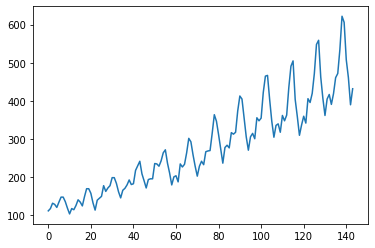

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

training_set = pd.read_csv('airline-passengers.csv')
#training_set = pd.read_csv('shampoo.csv')

training_set = training_set.iloc[:,1:2].values

#plt.plot(training_set, label = 'Shampoo Sales Data')
plt.plot(training_set, label = 'Airline Passangers Data')
plt.show()

## Prepare the training and testing dataset.


In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

## Create the model

In [ ]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        # Your code goes here
        self.lstm_block = nn.LSTM(input_size,hidden_size,num_layers,batch_first=True)
        self.fc = nn.Linear(hidden_size,num_classes)
        # define a lstm block and a fc block

    def forward(self, x):
       
        # Your code goes here
        # Define a forward function for the LSTM block

        h0 = Variable(torch.zeros(self.num_layers,x.size(0),self.hidden_size))
        c0 = Variable(torch.zeros(self.num_layers,x.size(0),self.hidden_size))

        output, (hn,cn) = self.lstm_block(x,(h0,c0))
        hn = hn.view(-1,self.hidden_size)
        out = self.fc(hn)
    
        return out

## Training

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):

    # Your code goes here
    # define a training iteration to the lstm model. Use loss variable to compute the training loss

    outputs = lstm(trainX)
    optimizer.zero_grad()

    loss = criterion(outputs,trainY)
    loss.backward()

    optimizer.step()

    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.61261
Epoch: 100, loss: 0.01168
Epoch: 200, loss: 0.00565
Epoch: 300, loss: 0.00275
Epoch: 400, loss: 0.00259
Epoch: 500, loss: 0.00248
Epoch: 600, loss: 0.00237
Epoch: 700, loss: 0.00227
Epoch: 800, loss: 0.00218
Epoch: 900, loss: 0.00210
Epoch: 1000, loss: 0.00204
Epoch: 1100, loss: 0.00198
Epoch: 1200, loss: 0.00193
Epoch: 1300, loss: 0.00188
Epoch: 1400, loss: 0.00183
Epoch: 1500, loss: 0.00179
Epoch: 1600, loss: 0.00175
Epoch: 1700, loss: 0.00172
Epoch: 1800, loss: 0.00170
Epoch: 1900, loss: 0.00169


## Test and Visualize the results. 
Plot the output of time series similar to the data plot above.

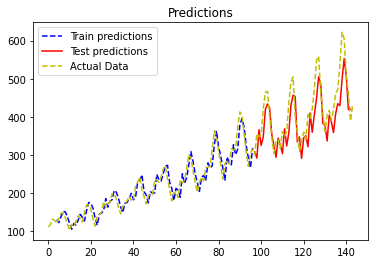

In [ ]:
def rescale(preds):
    preds = preds*(max(training_set) - min(training_set)) + min(training_set)
    return preds

with torch.no_grad():

    # rescaling predictions back to original data
    train_preds = rescale(lstm(trainX))
    test_preds = rescale(lstm(testX))

    # aligning predictions to corresponding time frames
    # won't be able to predict starting seq_length values for each train and test set
    train_range = range(seq_length,len(train_preds)+seq_length)
    test_range = range(len(train_preds)+seq_length,len(train_preds) + len(test_preds)+seq_length)

    plt.plot(train_range,train_preds,'b--',label='Train predictions')
    plt.plot(test_range,test_preds,'r-',label='Test predictions')
    
    plt.plot(training_set, 'y--',label = 'Actual Data')
    plt.legend()
    plt.title('Predictions')
    plt.show()


#### **Welcome to Assignment 4 (part-2) on Deep Learning for Computer Vision.**
This question consists of two subsection. In subsection-1 you'll have to code a Siamese Network, for subsection-2 you need to go through a official PyTorch tutorial on Object Detection, understand it and answer some questions.
  
#### **Instructions**
1. Use Python 3.x to run this notebook
2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'.
you should not change anything else in the code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.
3. Read documentation of each function carefully.
4. All the Best!

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data.sampler import BatchSampler
from torch.optim import lr_scheduler
from PIL import Image
import timeit
import itertools

## Please DONOT remove these lines. 
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)
########################

#### YOUR CODE STARTS HERE ####
# Check availability of GPU and set the device accordingly
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device = torch.device(device)
#### YOUR CODE ENDS HERE ####


#### Prepare the dataset for Siamese Network

In [ ]:
class SiameseDataset(Dataset):
    def __init__(self, train=True):
        
        self.train = train
        #### YOUR CODE STARTS HERE ####
        # Define a set of transforms for preparing the dataset
        self.transform =  transforms.Compose(
            [transforms.ToTensor(),
             transforms.Normalize((0.5),(0.5))])
        # convert the image to a pytorch tensor
        # normalise the images with mean and std of the dataset
        
        # Load the MNIST training, test datasets using `torchvision.datasets.MNIST
        # Set the train parameter to self.train and transform parameter to self.transform
        self.dataset = datasets.MNIST(root=rootdir/'MNIST',
                                                  train=self.train,
                                                  download=True,
                                                  transform=self.transform)
        # auxillary func
        labels_idcs = lambda l,y: [i for i in range(len(y)) if y[i].item()==l]

        #### YOUR CODE ENDS HERE ####
        if self.train:
            #### YOUR CODE STARTS HERE ####

            # assign input (x-values) of training data 
            self.train_data = torch.stack([data[0] for data in self.dataset])
            # assign labels of training data 
            self.train_labels = torch.tensor([data[1] for data in self.dataset])
            # get the set of all the labels in the dataset
            self.labels_all = {i for i in range(10)}# saving some computation
            self.label_to_idx = {i:label_idcs(i,self.train_labels) for i in labels_all} # assign a unique index to all labels in the dataset and store them in a dictionary 

            #### YOUR CODE ENDS HERE ####
        else:
            #### YOUR CODE STARTS HERE ####
            # assign input (x-values) of test data 
            self.test_data = torch.stack([data[0] for data in self.dataset])
            # assign labels of test data 
            self.test_labels = torch.tensor([data[1] for data in self.dataset])
            # get the set of all the labels in the dataset
            self.labels_all = {i for i in range(10)}
            self.label_to_idx = {i:label_idcs(i,self.test_labels) for i in labels_all} # assign a unique index to all labels in the dataset and store them in a dictionary 

            #### YOUR CODE ENDS HERE ####
            # DONOT change this line of code  
            random_state = np.random.RandomState(0)

            positive_samples = [] # this will be a list of lists
            for ind in range(0, len(self.test_data), 2):
              positive_samples.append([ind, random_state.choice(self.label_to_idx[self.test_labels[ind].item()]), 1])
            
            negative_samples = []
            for ind in range(1, len(self.test_data), 2):
              negative_samples.append([ind, random_state.choice(self.label_to_idx[np.random.choice(
                                                           list(self.labels_all - set([self.test_labels[ind].item()])))]), 0])
            
            # combine both positive and negative samples into a single variable
            #### YOUR CODE STARTS HERE ####
            get_list = lambda i: negative_samples if i%2 else positive_samples
            self.test_samples = [get_list(i)[i//2] for i in range(len(self.test_labels))]  
            #### YOUR CODE ENDS HERE ####
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        # get image pair, and the associated label (1 for similar, 0 for dissimilar)
        if self.train:
            #### YOUR CODE STARTS HERE ####
            # choose if training sample is similar or dissimilar
            target = np.random.choice([0,1])
            # choose two images call them `first_image` and `second_image`
            def get_index(l,s):
                #args: label and similarity
                nrc,li,ls = np.random.choice,self.label_to_idx,self.labels_all
                return nrc(li[l]) if s else nrc(li[nrc(list(ls-{l}))])
            
            first_image = self.train_data[index].squeeze()
            second_image = self.train_data[get_index(self.train_labels[index].item(),target)].squeeze()
            #### YOUR CODE ENDS HERE ####
        else:
            #### YOUR CODE STARTS HERE ####
            # select two images from self.test_samples, call them `first_image` and `second_image`
            first_image = self.test_data[self.test_samples[index][0]].squeeze()
            second_image = self.test_data[self.test_samples[index][1]].squeeze()
            target = self.test_samples[index][2]
            #### YOUR CODE ENDS HERE ####
        
        first_image = Image.fromarray(first_image.numpy(), mode='L')
        second_image = Image.fromarray(second_image.numpy(), mode='L')
        first_image = self.transform(first_image)
        second_image = self.transform(second_image)
        return (first_image, second_image), target


In [ ]:
class EmbeddingNet(nn.Module):
    def __init__(self):
        super(EmbeddingNet, self).__init__()
        #### YOUR CODE STARTS HERE ####
        # Define a sequential block as per the instructions below:
        # Build three blocks with each block containing: Conv->PReLU->Maxpool layers
        # Three conv layers should have 16, 32, 64 output channels respectively
        # Use convolution kernel size 3
        # For maxpool use a kernel size of 2 and stride of 2

        def base_block(in_c,out_c):
            return nn.Sequential(nn.Conv2d(in_c,out_c,3),
                                 nn.PReLU(),
                                 nn.MaxPool2d(kernel_size=2,stride=2))
    
        self.convnet = nn.Sequential(base_block(1,16),
                                     base_block(16,32),
                                     base_block(32,64)) 

        # Define linear->PReLU->linear->PReLU->linear
        # The first two linear layers should have 256 and 128 output nodes
        # The final FC layer should have 2 nodes
        self.fc = nn.Sequential(nn.Linear(1*1*64,256),
                                nn.PReLU(),
                                nn.Linear(256,128),
                                nn.PReLU(),
                                nn.Linear(128,2))

        #### YOUR CODE ENDS HERE ####

    def forward(self, x):
      #### YOUR CODE STARTS HERE ####
        # Define the forward pass, convnet -> fc
        
        output = self.convnet(x)
        output = self.fc(output.reshape(-1,64))
        #### YOUR CODE ENDS HERE ####
        return output

In [ ]:
class SiameseNetwork(nn.Module):
    def __init__(self, embedding_net):
        super(SiameseNetwork, self).__init__()
        self.embedding_net = embedding_net

    def forward(self, x1, x2):
        # Call the embedding network for both the inputs and return the output
        #### YOUR CODE ENDS HERE ####
        op1 = self.embedding_net(x1)
        op2 = self.embedding_net(x2)
        #### YOUR CODE ENDS HERE ####
        return op1, op2

Pairwise contrastive loss
$$
L\left(x_{0}, x_{1}, y\right)=\frac{1}{2} y\left\|f\left(x_{0}\right)-f\left(x_{1}\right)\right\|_{2}^{2}+\frac{1}{2}(1-y)\left\{\max (0, m-\sqrt{\|f(x_{0})-f(x_{1})\|_{2}^{2} + \epsilon)})\right\}^{2}
$$

In [ ]:
class ContrastiveLossSiamese(nn.Module):

    def __init__(self, margin):
        super(ContrastiveLossSiamese, self).__init__()
        self.margin = margin
        self.eps = 1e-9

    def forward(self, output1, output2, target):
        # Use the equation mentioned above to define the loss
        #### YOUR CODE STARTS HERE ####
        l2_norm_2 = F.pairwise_distance(output1,output2,eps=self.eps)
        true_match_l = target*torch.pow(l2_norm_2,2)
        true_diff_l = (1-target)*torch.pow(torch.clamp(self.margin - l2_norm_2,min=0.),2)
        loss_value = true_match_l + true_diff_l
        #### YOUR CODE ENDS HERE ####
        loss_value = loss_value.mean()

        return loss_value

In [ ]:
def train(model, train_loader, device, optimizer, criterion, epoch):
    model.train()
    losses = []
    total_loss = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        target = target if len(target) > 0 else None
        #### YOUR CODE STARTS HERE ####
        # send the image, target to the device
        # data is not a single value here,
        # ensure datatype of variable `data` is tuple
        data = data[0].to(device),data[1].to(device)
        target = target.to(device)
        # flush out the gradients stored in optimizer
        optimizer.zero_grad()
        # pass the image to the model and assign the output to variable named outputs
        # python star operator will be useful here
        # if the datatype of outputs is not a tuple, make it to a tuple

        outputs = model(*data)

        # create inputs to the contrastive loss (datatype should be tuple)
        # calculate the loss using criterion 
        loss = criterion(*outputs,target)
        # append the loss to losses list and update the total_loss variable
        losses.append(loss)
        total_loss += loss
        # do a backward pass
        loss.backward()
        # update the weights
        optimizer.step()
        #### YOUR CODE ENDS HERE ####

        if batch_idx % 20 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data[0]), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), np.mean([loss.item() for loss in losses])))  
    total_loss /= (batch_idx + 1)
    print('Average loss on training set: {:.6f}'.format(total_loss))

    return total_loss

def test(model, test_loader, device, criterion):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
          target = target if len(target) > 0 else None
          #### YOUR CODE STARTS HERE ####
          # send the image, target to the device
          # data is not a single value here,
          # ensure datatype of variable `data` is tuple
          data = data[0].to(device),data[1].to(device)
          target = target.to(device)
          # pass the image to the model and assign the output to variable named outputs
          # python star operator will be useful here
          # if the datatype of outputs is not a tuple, make it to a tuple
          outputs = model(*data)

          # create inputs to the contrastive loss
          # datatype of target should be tuple
          # calculate the loss
          loss = criterion(*outputs,target)
          # update the test_loss variable
          test_loss += loss
          #### YOUR CODE ENDS HERE ####

    test_loss /= len(test_loader)
    print('Average loss on test set: {:.6f}'.format(test_loss))
    return test_loss


In [ ]:
# define the training and test sets
# use SiameseDataset
train_dataset = SiameseDataset(train=True)
test_dataset = SiameseDataset(train=False)

# create dataloaders for training and test datasets
# use a batch size of 128 and set shuffle=True for the training set, set num_workers to 2 and pin_memory to True
train_dataloader = torch.utils.data.DataLoader(train_dataset,batch_size=128,shuffle=True,num_workers=2,pin_memory=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset,batch_size=128,num_workers=2,pin_memory=True)

In [ ]:
margin = 1.
# create a instance of the embedding network and pass it as input to Siamese network
embedding_net = EmbeddingNet().to(device)
model = SiameseNetwork(embedding_net).to(device)
# define the contrative loss with the specified margin
criterion = ContrastiveLossSiamese(margin)
optimizer = torch.optim.Adam(model.parameters(),weight_decay=0.001,amsgrad=True)

In [ ]:
start = timeit.default_timer()

train_losses=[]
test_losses=[]
for epoch in range(1, 5):
  train_losses += [train(model, train_dataloader, device, optimizer, criterion, epoch)]
  test_losses += [test(model, test_dataloader, device, criterion)]

stop = timeit.default_timer()
print('Total time taken: {} seconds'.format(int(stop - start)) )

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.544942
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.370663
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.338280
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.321311
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.310637
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.307097
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.302536
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.299958
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.296691
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.293810
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.291955
Train Epoch: 1 [28160/60000 (47%)]	Loss: 0.289458
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.288164
Train Epoch: 1 [33280/60000 (55%)]	Loss: 0.286191
Train Epoch: 1 [35840/60000 (60%)]	Loss: 0.285056
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.284309
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.283344
Train Epoch: 1 [43520/60000 (72%)]	Loss: 0.282482
Train Epoch: 1 [46080/60000 (77%)]	Loss: 0.282008
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.279981
Train Epoc

### Question 4

Run the code cell above and plot(on the same graph) the average train and test losses w.r.t epochs trained.

Text(0.5, 1.0, 'Loss vs Epochs')

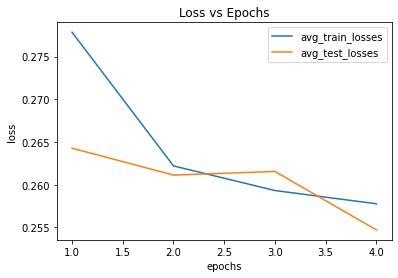

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,5),train_losses,label='avg_train_losses')
plt.plot(range(1,5),test_losses,label='avg_test_losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Loss vs Epochs')

### Question 5

We have looked at training a Siamese Network with a pairwise contrastive loss. How would you modify the architecture above to use a triplet loss? The triplet loss is a ranking loss that uses image triplets consisting of an anchor $x_a$, a positive sample(similar to the anchor image) $x_p$ and a negative sample(dissimilar to the anchor image) $x_n$. Given triplet $(x_a, x_p, x_n)$ the teiplet loss is:

$$
L\left(x_{a}, x_{p}, x_{n}\right)=\max \left(0, m + \|f(x_{a})-f(x_{p})\|_{2}^{2} - \|f(x_{a})-f(x_{n})\|_{2}^{2}\right)
$$

1. Write the dataloader to get triplets.
2. Write code for class TripletLossSiamese. (the triplet loss)
3. Describe in words how would you modify the network architecture to train it with a triplet loss.

In [ ]:
# Question 2.1, dataloader for triplets
class TripletDataset(Dataset):
    def __init__(self, train=True):
        
        self.train = train
        #### YOUR CODE STARTS HERE ####
        # Define a set of transforms for preparing the dataset
        self.transform =  transforms.Compose(
            [transforms.ToTensor(),
             transforms.Normalize((0.5),(0.5))]
        )# convert the image to a pytorch tensor
                          # normalise the images with mean and std of the dataset
        
        # Load the MNIST training, test datasets using `torchvision.datasets.MNIST
        # Set the train parameter to self.train and transform parameter to self.transform
        self.dataset = datasets.MNIST(rootdir/'MNIST',
                                      train=self.train,
                                      transform=self.transform,
                                      download=True)
        
        #auxillary func
        labels_idcs = lambda l,y: [i for i in range(len(y)) if y[i].item()==l]


        #### YOUR CODE ENDS HERE ####
        if self.train:
            #### YOUR CODE STARTS HERE ####
            # assign input (x-values) of training data 
            self.train_data = torch.stack([data[0] for data in self.dataset])
            # assign labels of training data 
            self.train_labels = torch.tensor([data[1] for data in self.dataset])
            # get the set of all the labels in the dataset
            self.labels_all = {i for i in range(10)}
            self.label_to_idx = {i:label_idcs(i,self.train_labels) for i in labels_all} # assign a unique index to all labels in the dataset and store them in a dictionary 

            #### YOUR CODE ENDS HERE ####
        else:
            #### YOUR CODE STARTS HERE ####
            # assign input (x-values) of test data 
            self.test_data = torch.stack([data[0] for data in self.dataset])
            # assign labels of test data 
            self.test_labels = torch.tensor([data[1] for data in self.dataset])
            # get the set of all the labels in the dataset
            self.labels_all = {i for i in range(10)}
            self.label_to_idx = {i:label_idcs(i,self.test_labels) for i in labels_all} # assign a unique index to all labels in the dataset and store them in a dictionary 

            #### YOUR CODE ENDS HERE ####
            # DONOT change this line of code  
            random_state = np.random.RandomState(0)
            triplets = [] #this will be list of lists
            for i in range(len(self.test_data)):
                triplets.append([i, random_state.choice(self.label_to_idx[self.test_labels[i].item()]),
                 random_state.choice(self.label_to_idx[np.random.choice(list(self.labels_all - set([self.test_labels[i].item()])))])
                                ])
            self.test_samples = triplets

           
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        # get image triplet
        if self.train:
            anchor, anchor_label = self.train_data[index], self.train_labels[index].item
            #### YOUR CODE STARTS HERE ####
            #choose positive and negative image call them `positive` and `negative` respectively

            def get_index(l,s):
                nrc,li,ls = np.random.choice,self.label_to_idx,self.labels_all
                return nrc(li[l]) if s else nrc(li[nrc(list(ls-{l}))])

            positive = self.train_data[get_index(anchor_label,1)] 
            negative = self.train_data[get_index(anchor_label,0)]
            #### YOUR CODE ENDS HERE ####
        else:
            #### YOUR CODE STARTS HERE ####
            # select three images from self.test_samples
            get_img = lambda idx1,idx2: self.test_data[self.test_samples[idx1][idx2]].squeeze()
            anchor = get_img(index,0)
            positive = get_img(index,1)
            negative = get_img(index,2)
            #### YOUR CODE ENDS HERE ####
        
        anchor = Image.fromarray(anchor.numpy(), mode='L')
        positive = Image.fromarray(positive.numpy(), mode='L')
        negative = Image.fromarray(negative.numpy(), mode='L')
        anchor = self.transform(anchor)
        positive = self.transform(positive)
        negative = self.transform(negative)
        return (anchor, positive, negative), []

In [ ]:
# Question 2.2, define triplet loss
class TripletLossSiamese(nn.Module):

    def __init__(self, margin):
        super(TripletLossSiamese, self).__init__()
        self.margin = margin

    def forward(self, output_anchor, output_positive, output_negative):
        # Use the triplet loss equation mentioned above to define the loss
        #### YOUR CODE STARTS HERE ####
        pos_L2 = F.pairwise_distance(output_anchor,output_positive).pow(2)
        neg_L2 = F.pairwise_distance(output_anchor,outpu_negative).pow(2)
        loss_value = torch.clamp(self.margin + pos_L2 - neg_L2,min=0)
        #### YOUR CODE ENDS HERE ####
        loss_value = loss_value.mean()

        return loss_value

## Architectural changes for Triplet Loss (Answer)

This time, we will need to have three forward passes through the embedding net(which stays the same), one for the anchor ,positive and negative sample.  
Summarizing the changes:
 - Input:
    - take in 3 images instead of 2
 - Forward:
    - compute 3 embeddings instead of 2
 - Backprop:
    - nothing changes here
 - output:
    - return 3 embeddings instead of 2

## Object Detection

Go through the [Torchvision Object Detection Tutorial](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html) and ensure you understand the tutorial completely!

After you have completely gone through the tutorial answer the following questions!

### Question 6

Consider the metrics `AP@IoU=0.5` and `AP@IoU=0.75` used in the tutorial. Which of the following statements is True?  

1. `IoU@0.75` will always be less than `IoU@0.5`
2. `IoU@0.75` will always be  greater than `IoU@0.5` 
3. `IoU@0.75` need not be always be less than `IoU@0.5`
4. `IoU@0.75` need not always be  greater than `IoU@0.5` 

The effects of increases in IOU threshold are as follows:
 - The number of true positives will decrease
 - The number of false positives will increase
 - The number of false negatives should remain unaffected as we are only changing the evaluation metric and not the method so whatever the model was ignoring, it will continue to ignore...
 - Similar reason applies to True Negatives;

 Hence, expected behaviour:
 - precision decreases :$TP \over TP + FP$
    - as $TP + FP$ should remain almost same and $TP$ decreases
 - recall decreases as well: $TP \over TP + FN$

as mAP is the mean Precision averaged over multiple recalls:
 - for a particular recall level, the max precision beyond that recall is expected to be lower
  
 HENCE,
  
OPTION 1 should be TRUE

### Question 7

Tutorial uses a network that is pre-trained on COCO dataset. Will training this model from scratch improve the performance? Provide justification for your answer. (Hint: You don't really have to re-train the model for this)

Highly probable that it won't.  
Reasons:
 - finetuning a pretrained model is likely to outperform training from scratch as most of the filters that were useful on a larger generic dataset like COCO will be reused.
 - learning from scratch might not result in those filters and there is a high chance of over-fitting the current dataset due to its small size.
    - this might lead to higher train performance *after a lot of iterations* but the model is unlikely to generalise well to the test set and the performance would worsen. 

### Question 8

Write code to calculate IoU between aligned predicted bounding-boxes bbox_p and ground-truth bounding-boxes bbox_gt. Assume a co-ordinate system that has origin (0,0) at the upper-left corner of the image, and to the  right and down are +ve directions of x-axis and y-axis respectively.

In [27]:
def calculate_iou(bbox_p, bbox_gt):
    #input: bbox_p and bbox_gt are (N,4) tensors
    #output: ious (N,) vector
    N = bbox_p.size(0)
    
    #### YOUR CODE STARTS HERE ####
    # write code to compute the IoU between the bounding boxes
    
    # convenience aliases
    x1p,y1p,x2p,y2p = (bbox_p[:][i] for i in range(4))
    x1gt,y1gt,x2gt,y2gt = (bbox_gt[:][i] for i in range(4))

    p_area = (x2p - x1p)*(y2p - y1p)
    gt_area = (x2gt - x1gt)*(y2gt - y1gt)

    x_int1 = torch.maximum(x1p,x1gt)
    x_int2 = torch.minimum(x2p,x2gt)
    y_int1 = torch.maximum(y1p,y1gt)
    y_int2 = torch.minimum(y2p,y2gt)

    int_area = (x_int2 - x_int1)*(y_int2 - y_int1)

    ious = int_area/(p_area + gt_area - int_area) 
    
    #### YOUR CODE ENDS HERE ####
    
    return ious